In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity

In [34]:
def load_grayscale_image(image_path):
    """загрузка изображения в оттенках серого"""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"не удалось загрузить изображение: {image_path}")
    return image

In [35]:
def plot_histogram(image, title="гистограмма"):
    """построение гистограммы изображения"""
    plt.figure(figsize=(10, 4))
    plt.hist(image.ravel(), bins=256, range=[0, 256], alpha=0.7, color='gray')
    plt.title(title)
    plt.xlabel('значение пикселя')
    plt.ylabel('частота')
    plt.grid(True, alpha=0.3)
    plt.show()

In [36]:
def gamma_correction(image, gamma=1.0):
    """гамма-коррекция изображения"""
    image_normalized = image / 255.0
    corrected = np.power(image_normalized, gamma)
    return np.uint8(corrected * 255)

In [37]:
def statistical_color_correction(source_image, target_image):
    """статистическая цветокоррекция на основе целевого изображения"""
    source_mean = np.mean(source_image)
    source_std = np.std(source_image)
    
    target_mean = np.mean(target_image)
    target_std = np.std(target_image)
    
    corrected = (source_image - source_mean) * (target_std / source_std) + target_mean
    
    corrected = np.clip(corrected, 0, 255)
    
    return np.uint8(corrected)

In [38]:
def threshold_filtering(image, threshold_type, threshold_value=127, max_value=255):
    """пороговая фильтрация с различными параметрами"""
    if threshold_type == 'binary':
        _, filtered = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)
    elif threshold_type == 'binary_inv':
        _, filtered = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY_INV)
    elif threshold_type == 'trunc':
        _, filtered = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_TRUNC)
    elif threshold_type == 'tozero':
        _, filtered = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_TOZERO)
    elif threshold_type == 'tozero_inv':
        _, filtered = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_TOZERO_INV)
    elif threshold_type == 'otsu':
        _, filtered = cv2.threshold(image, 0, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        raise ValueError("неизвестный тип пороговой фильтрации")
    
    return filtered

In [39]:
def compare_images(original, corrected, title):
    """сравнение изображений с вычислением MSE и SSIM"""
    mse = mean_squared_error(original, corrected)
    ssim = structural_similarity(original, corrected)
    
    print(f"{title}:")
    print(f"MSE: {mse:.4f}")
    print(f"SSIM: {ssim:.4f}")
    print("-" * 50)
    
    return mse, ssim

изображение успешно загружено
размер изображения: (400, 600)


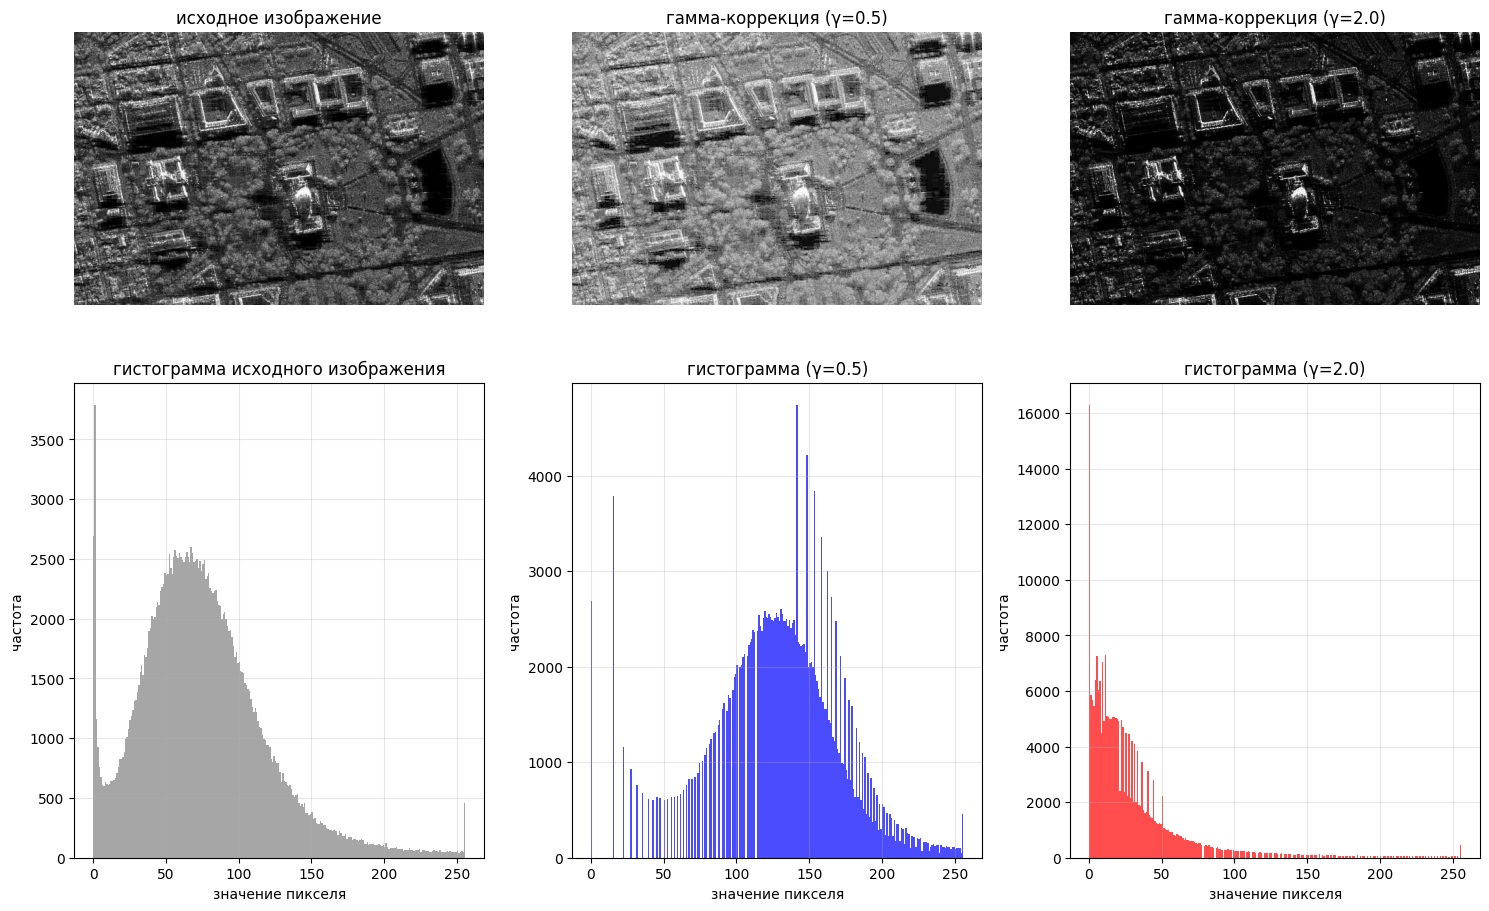

сравнение гамма-коррекции:
гамма-коррекция (γ=0.5):
MSE: 3250.4291
SSIM: 0.7875
--------------------------------------------------
гамма-коррекция (γ=2.0):
MSE: 2383.7636
SSIM: 0.5270
--------------------------------------------------


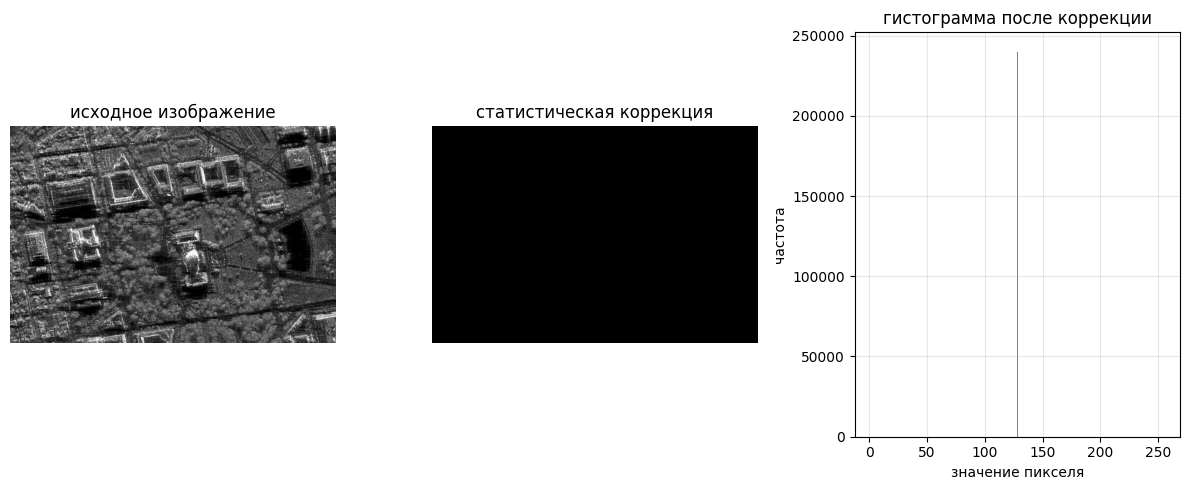

статистическая цветокоррекция:
MSE: 4721.2585
SSIM: 0.0734
--------------------------------------------------


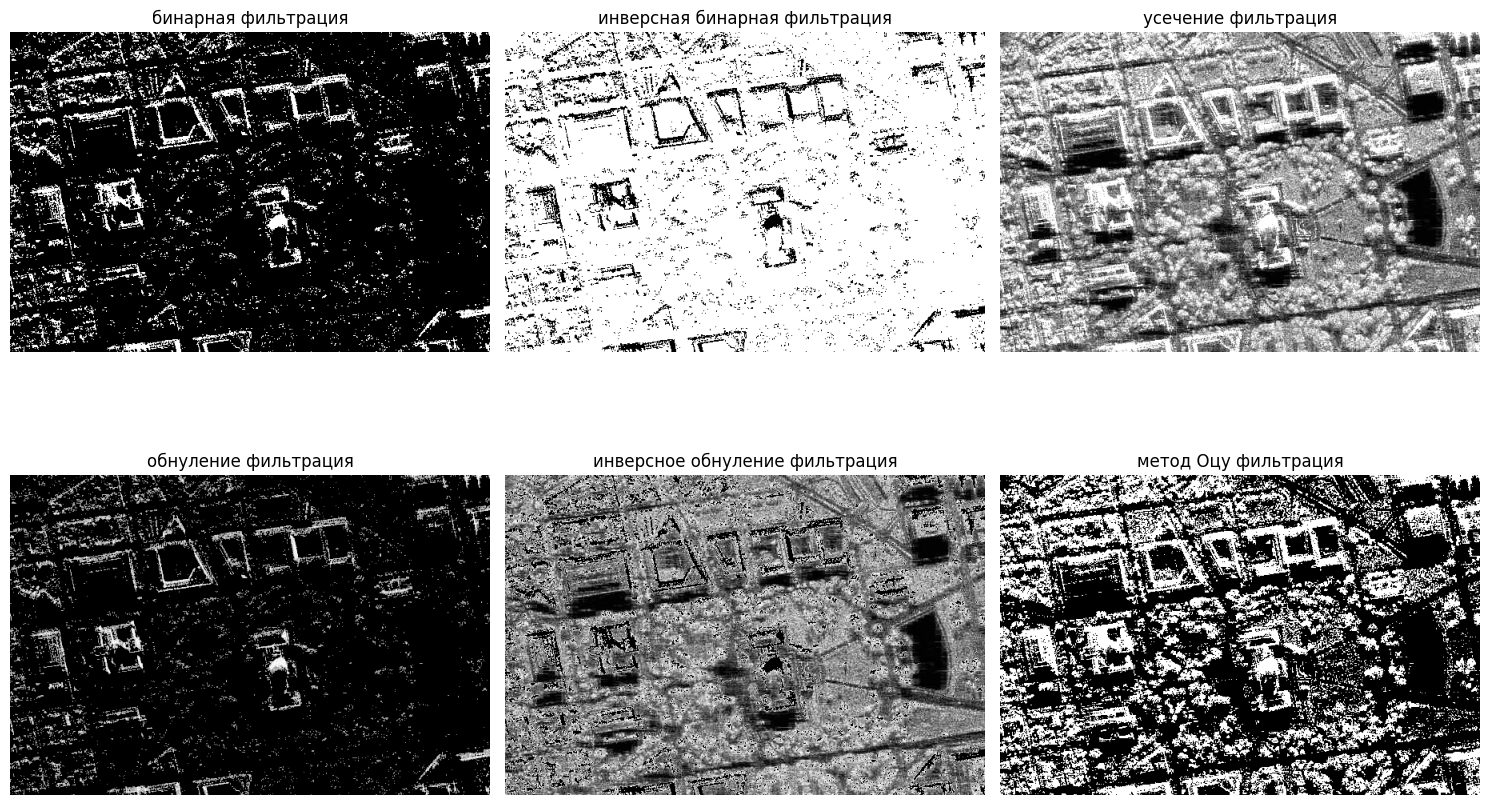

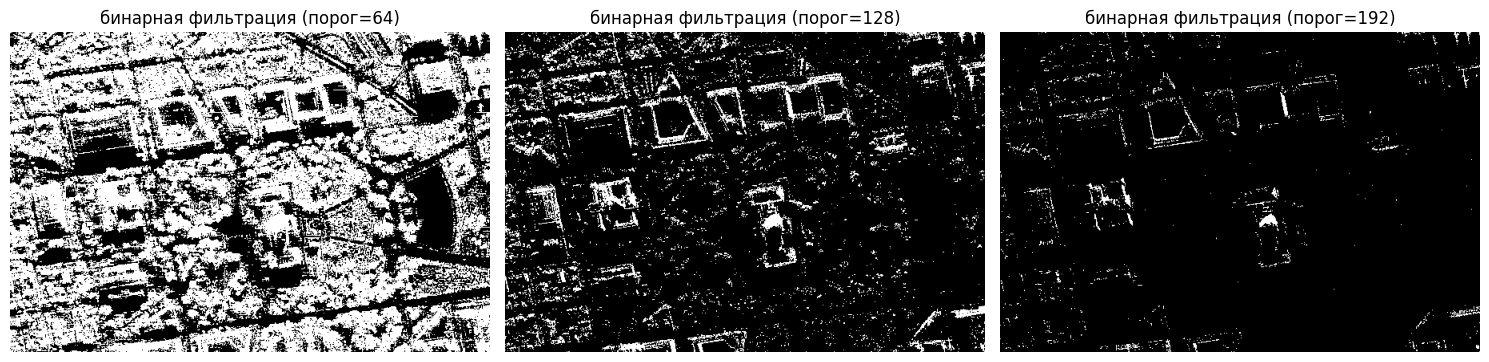

In [40]:
def main():
    #1. загрузка изображения
    try:
        image = load_grayscale_image('C:\\Users\\aderg\\OneDrive\\Desktop\\imageprocessing\\HomeWork1\\sar_1_gray.jpg')
        print("изображение успешно загружено")
        print(f"размер изображения: {image.shape}")
    except Exception as e:
        print(f"ошибка при загрузке изображения: {e}")
    
    #2. построение гистограммы исходного изображения
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('исходное изображение')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.hist(image.ravel(), bins=256, range=[0, 256], alpha=0.7, color='gray')
    plt.title('гистограмма исходного изображения')
    plt.xlabel('значение пикселя')
    plt.ylabel('частота')
    plt.grid(True, alpha=0.3)
    
    #3. гамма-коррекция
    gamma_low = 0.5  #gamma < 1
    gamma_high = 2.0  #gamma > 1
    
    corrected_low = gamma_correction(image, gamma_low)
    corrected_high = gamma_correction(image, gamma_high)
    
    #4. сравнение результатов гамма-коррекции
    plt.subplot(2, 3, 2)
    plt.imshow(corrected_low, cmap='gray')
    plt.title(f'гамма-коррекция (γ={gamma_low})')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(corrected_high, cmap='gray')
    plt.title(f'гамма-коррекция (γ={gamma_high})')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.hist(corrected_low.ravel(), bins=256, range=[0, 256], alpha=0.7, color='blue')
    plt.title(f'гистограмма (γ={gamma_low})')
    plt.xlabel('значение пикселя')
    plt.ylabel('частота')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 3, 6)
    plt.hist(corrected_high.ravel(), bins=256, range=[0, 256], alpha=0.7, color='red')
    plt.title(f'гистограмма (γ={gamma_high})')
    plt.xlabel('значение пикселя')
    plt.ylabel('частота')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    print("сравнение гамма-коррекции:")
    compare_images(image, corrected_low, f"гамма-коррекция (γ={gamma_low})")
    compare_images(image, corrected_high, f"гамма-коррекция (γ={gamma_high})")
    
    #5. статистическая цветокоррекция

    target_stats = np.ones_like(image) * 128  #целевое среднее значение
    
    statistical_corrected = statistical_color_correction(image, target_stats)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('исходное изображение')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(statistical_corrected, cmap='gray')
    plt.title('статистическая коррекция')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.hist(statistical_corrected.ravel(), bins=256, range=[0, 256], alpha=0.7, color='green')
    plt.title('гистограмма после коррекции')
    plt.xlabel('значение пикселя')
    plt.ylabel('частота')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    compare_images(image, statistical_corrected, "статистическая цветокоррекция")

    #6. пороговая фильтрация с различными параметрами
    threshold_types = [
        ('binary', 'бинарная'),
        ('binary_inv', 'инверсная бинарная'),
        ('trunc', 'усечение'),
        ('tozero', 'обнуление'),
        ('tozero_inv', 'инверсное обнуление'),
        ('otsu', "метод Оцу")
    ]
    
    plt.figure(figsize=(15, 10))
    
    for i, (thresh_type, title) in enumerate(threshold_types, 1):
        if thresh_type == 'otsu':
            filtered = threshold_filtering(image, thresh_type)
        else:
            filtered = threshold_filtering(image, thresh_type, 127, 255)
        
        plt.subplot(2, 3, i)
        plt.imshow(filtered, cmap='gray')
        plt.title(f'{title} фильтрация')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # тестирование различных пороговых значений
    thresholds = [64, 128, 192]
    
    plt.figure(figsize=(15, 5))
    
    for i, threshold in enumerate(thresholds, 1):
        filtered = threshold_filtering(image, 'binary', threshold, 255)
        
        plt.subplot(1, 3, i)
        plt.imshow(filtered, cmap='gray')
        plt.title(f'бинарная фильтрация (порог={threshold})')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()